# **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

# **News Data Input**

In [3]:
import pandas as pd
import numpy as np

In [4]:
true_path = '/content/drive/MyDrive/True.csv'
fake_path = '/content/drive/MyDrive/Fake.csv'

In [5]:
true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [6]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# **Visualizig Data**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

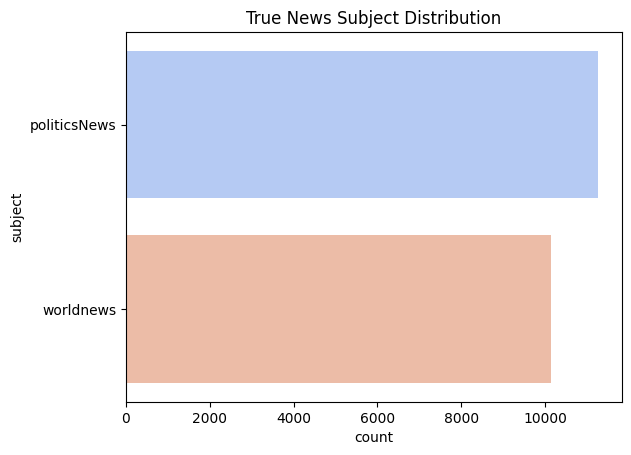

In [9]:
sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

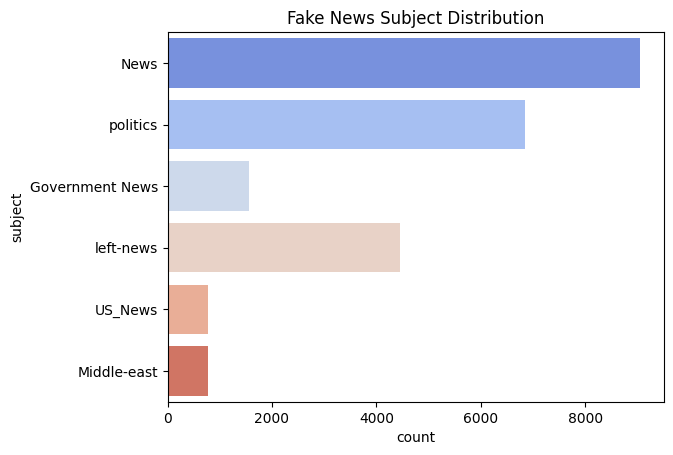

In [10]:
sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

# **Generating Real News Word Cloud**

In [11]:
from wordcloud import WordCloud

In [12]:
real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

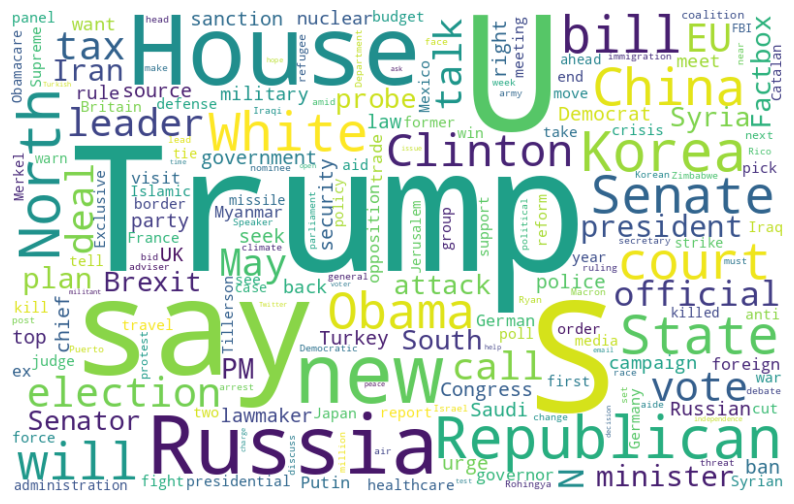

In [13]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Fake News Word Coud**

In [14]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

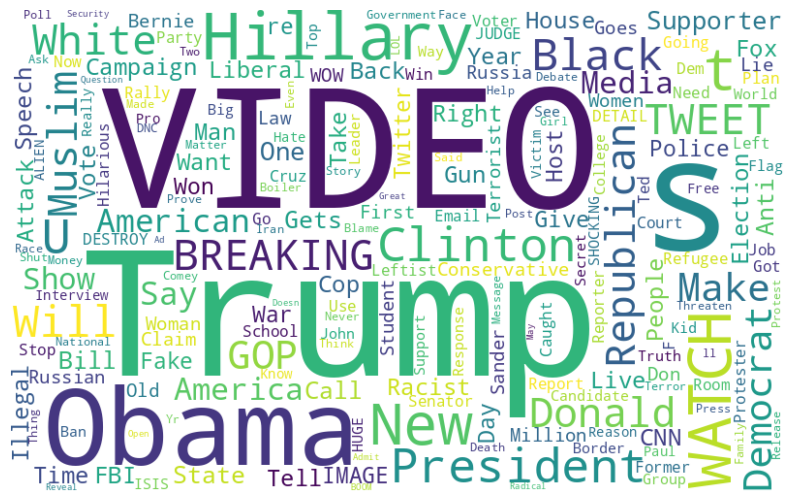

In [15]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Data Preprocessing**

## *Combining Data*

In [16]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## *Inspect Lengths of News*

In [17]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


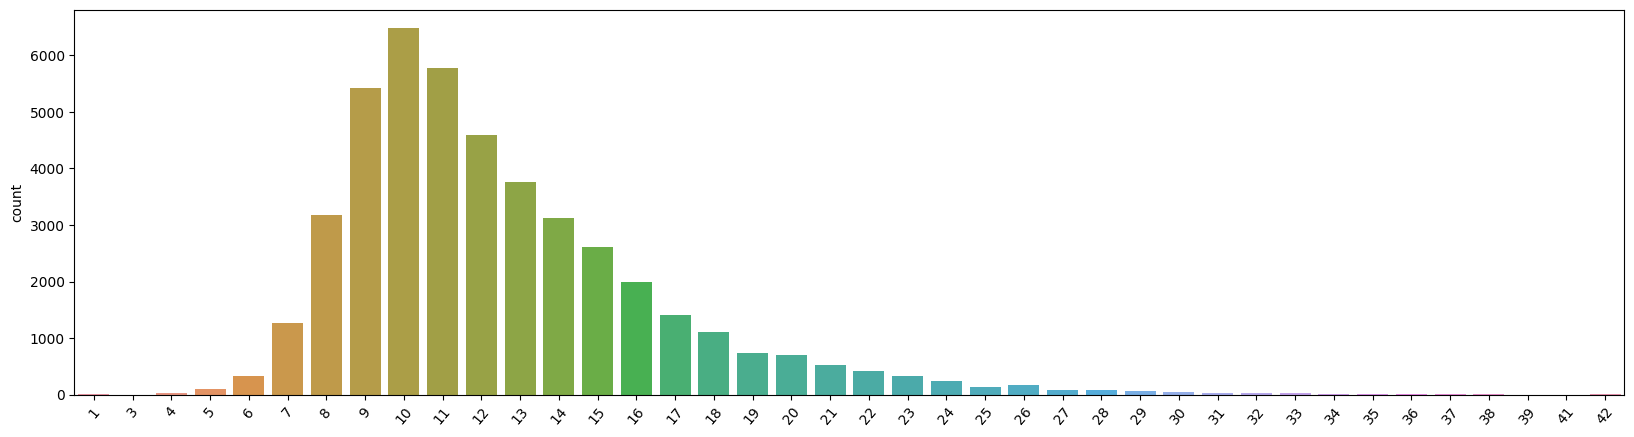

In [18]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [19]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## *Purify and Shuffle the DataFrame*

In [20]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Arizona governor declares victory in $3.5-bill...,1
1,Agencies dither over who leads A380 engine exp...,1
2,Factbox: Trump on Twitter (Nov 27) - Networks,1
3,Desperate Lindsey Graham Calls Clinton Founda...,0
4,"Trump, in shift, to call for top tax rate of 3...",1
...,...,...
44893,Search for missing Argentine submarine reaches...,1
44894,Top ranks of career U.S. diplomats thin under ...,1
44895,"‘Affluenza Teen’ Transferred To Adult Court, ...",0
44896,Mozambique's president dismisses head of intel...,1


## *Split Data into Training, Validation, Test*

In [21]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## *Dataframe to csv*

In [22]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## *Performing Data Cleaning*

In [23]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [25]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [26]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## *Obtaining The Total Words Present In The Dataset*

In [27]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

19174

## *Preparing The Data By Performing Tokenization And Padding*

In [28]:
from nltk import word_tokenize

In [29]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])
     

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# *BERT*

In [31]:
!pip install transformers

import torch
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.2 MB/s eta 0:00:00


In [32]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

## *Load Dataset Class*

In [33]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
#         BERT tokens
#         tokens_b = self.tokenizer.tokenize(text_b)
#         word_pieces += tokens_b + ["[SEP]"]
#         len_b = len(word_pieces) - len_a
        
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 28734
valset size: 7184
testset size:  8980


## *Sampling and Observing Tensors*

In [34]:
sample_idx = 0

statement, label = trainset.df.iloc[sample_idx].values

tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
FOUR PREVIOUSLY DEPORTED ILLEGAL ALIENS Charged In Rape, Beating Of Couple

tokens: 
['[CLS]', 'four', 'previously', 'deported', 'illegal', 'aliens', 'charged', 'in', 'rape', ',', 'beating', 'of', 'couple', '[SEP]']

label: 0

--------------------

tokens_tensor: 
tensor([  101,  2176,  3130, 17929,  6206, 12114,  5338,  1999,  9040,  1010,
         6012,  1997,  3232,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
0




## *Reforming the Dataset to Fit the Model*

In [35]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)


In [36]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 28]) 
tensor([[  101,  2176,  3130, 17929,  6206, 12114,  5338,  1999,  9040,  1010,
          6012,  1997,  3232,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  2317,  2160,  2758,  2053,  3431,  2000, 24978,  2278,  1010,
          2021,  8398,  1005,  1055,  2003,  2367,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  7702, 14295,  2030, 12394,  2410,  3146,  3565, 11263,  4859,
          4573,  1024, 19044,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  9253,  1011,  6394,  4037, 12386,  2049,  5884,  2153,  1998,
          2049,  6394,  3954,  2003,  3974,  2010,  4365,  2568,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  7262,  1024,  1057,  1012,  1055,  1012

## *Model Construction*

In [37]:

from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [38]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

## *Fine-Tuning of BERT*

In [39]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        train_loss += loss.item()

        # if batch_idx == len(trainloader)-1:
        #     _, acc = get_predictions(model, trainloader, compute_acc=True)

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cuda:0


  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

## *Save Model*

In [40]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


##*Load Model*

In [41]:
# model = torch.load('./best_model.pth')
# model = model.to(device)

## *Test*

[[0.96333783 0.00264667]
 [0.03666217 0.99735333]]
Acc:  0.9805122494432071


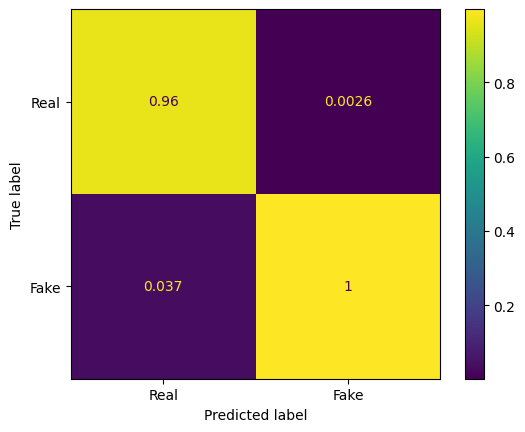

In [42]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [43]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']], 
                          testset.df.loc[:, ['true']], 
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,Arizona governor declares victory in $3.5-bill...,1,1
1,New Afghan peace talks expected in Oman but Ta...,1,1
2,U.S. ELECTIONS May Already Be In Serious Jeopa...,0,0
3,VAN JONES AND CNN’S DON LEMON ON OBAMA’S “I’m ...,0,0
4,Timeline: U.S. prosecutors lay out Flynn's dea...,1,1
...,...,...,...
8975,OBAMA LIED To Protect Hillary..New Wikileaks E...,0,0
8976,Montana Dems Hilariously Troll Reporter-Slamm...,0,0
8977,Why Do Hillary And Barack Choose Islam Over Ch...,0,0
8978,HYPOCRISY: DEMOCRAT SENATOR Criticizes Preside...,0,0


In [44]:
from sklearn.metrics import classification_report
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4685
           1       0.96      1.00      0.98      4295

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



## *Insight on Wrong Classification*

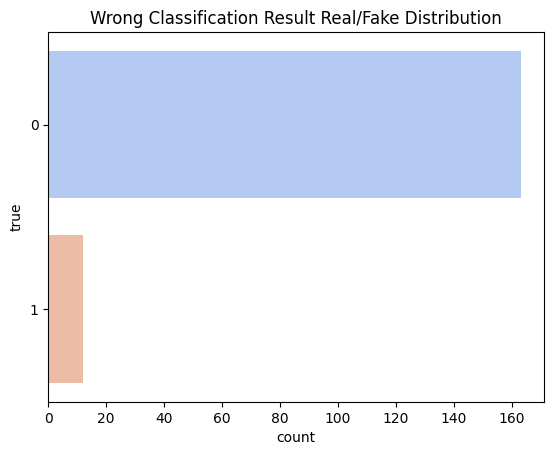

In [45]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [46]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array(['U.S. Senate Passes Bipartisan Bill Claims to Facilitate ‘Better Public Access’ to Gov’t Records',
       'DRUNK REFUGEES Spit On And Bite German Nurses: Force Hospital To Hire Security',
       ' Maine Voters Tell Trump To Go F*ck Himself, Expand Medicaid Through Obamacare',
       'Two Trump Tweets Debunk Russian Connection Conspiracy',
       ' Louisiana Governor Blasts Trump Over His Photo-Op Exploitation',
       ' Costco Raises Minimum Wage For Workers As Republicans Continue To Do Nothing',
       'ISRAEL WILL NAME New Train Station Near Western Wall After President Donald Trump',
       'Q&A: Did Sessions break the law by denying knowledge of Russia contacts?',
       ' Anti-Abortion Laws Collapse In Major Defeat For The Right',
       'AIR FORCE WILL EASE POLICY ON DISCHARGING TRANSGENDERS',
       ' Texas Gun Nuts Open Fire On Democratic Office Of Gun Control-Supporting Senator',
       'FBI Warns Philly Colleges Of Threat On Monday: What You Need To Know',
       ' Re